In [5]:
using RDatasets, DataFrames, CairoMakie
CairoMakie.activate!()
Makie.inline!(true)

true

In [2]:
RDatasets.datasets("datasets")

Row,Package,Dataset,Title,Rows,Columns
,String15,String31,String,Int64,Int64
1,datasets,BOD,Biochemical Oxygen Demand,6,2
2,datasets,CO2,Carbon Dioxide Uptake in Grass Plants,84,5
3,datasets,Formaldehyde,Determination of Formaldehyde,6,2
4,datasets,HairEyeColor,Hair and Eye Color of Statistics Students,32,4
5,datasets,InsectSprays,Effectiveness of Insect Sprays,72,2
6,datasets,LifeCycleSavings,Intercountry Life-Cycle Savings Data,50,6
7,datasets,Loblolly,Growth of Loblolly pine trees,84,4
8,datasets,OrchardSprays,Potency of Orchard Sprays,64,4
9,datasets,PlantGrowth,Results from an Experiment on Plant Growth,30,2


In [3]:
cars=RDatasets.dataset("datasets","cars")

Row,Speed,Dist
,Int64,Int64
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10
7,10,18
8,10,26
9,10,34


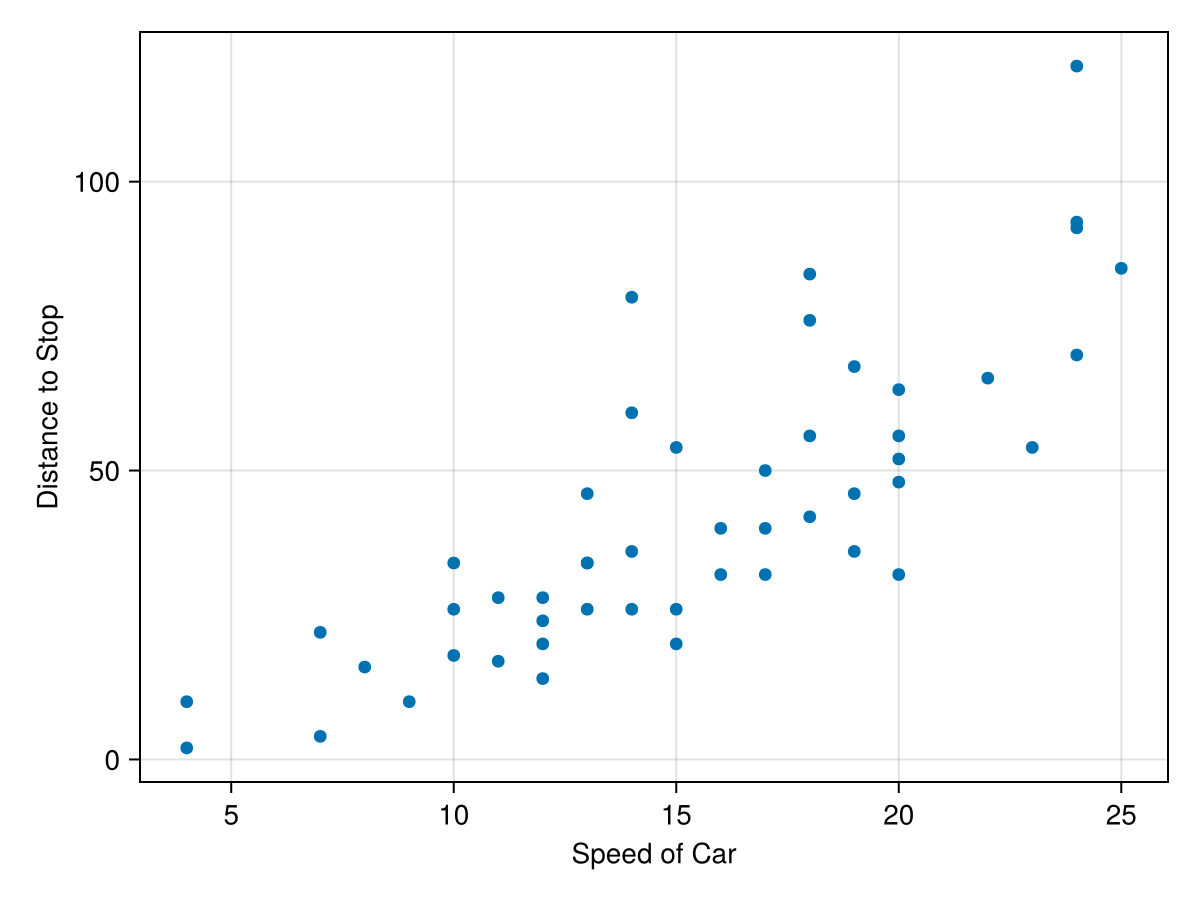

In [4]:
fig = Figure()
ax = Axis(fig[1,1], xlabel="Speed of Car", ylabel = "Distance to Stop")
scatter!(ax, cars.Speed, cars.Dist)
fig

In [5]:
save("../assets/plots/linear-regression/speed-dist.png", fig)

CairoMakie.Screen{IMAGE}


In [6]:
data = DataFrame(x=[1,3,4,6,7,9, 10], y = [10, 9, 7, 6, 5, 4, 2])

Row,x,y
,Int64,Int64
1,1,10
2,3,9
3,4,7
4,6,6
5,7,5
6,9,4
7,10,2


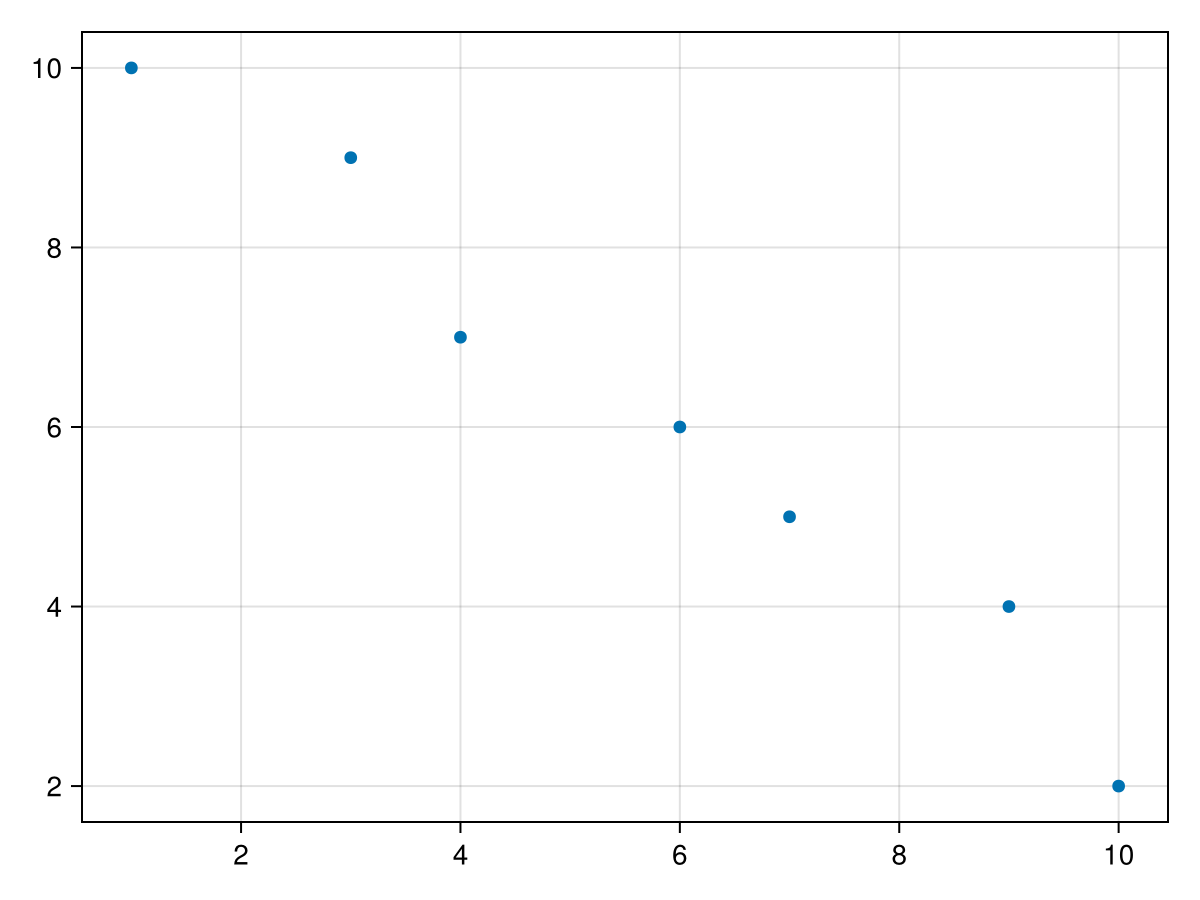

In [7]:
fig = scatter(data.x, data.y)

In [8]:
save("../assets/plots/linear-regression/simple-scatter.png", fig)

CairoMakie.Screen{IMAGE}


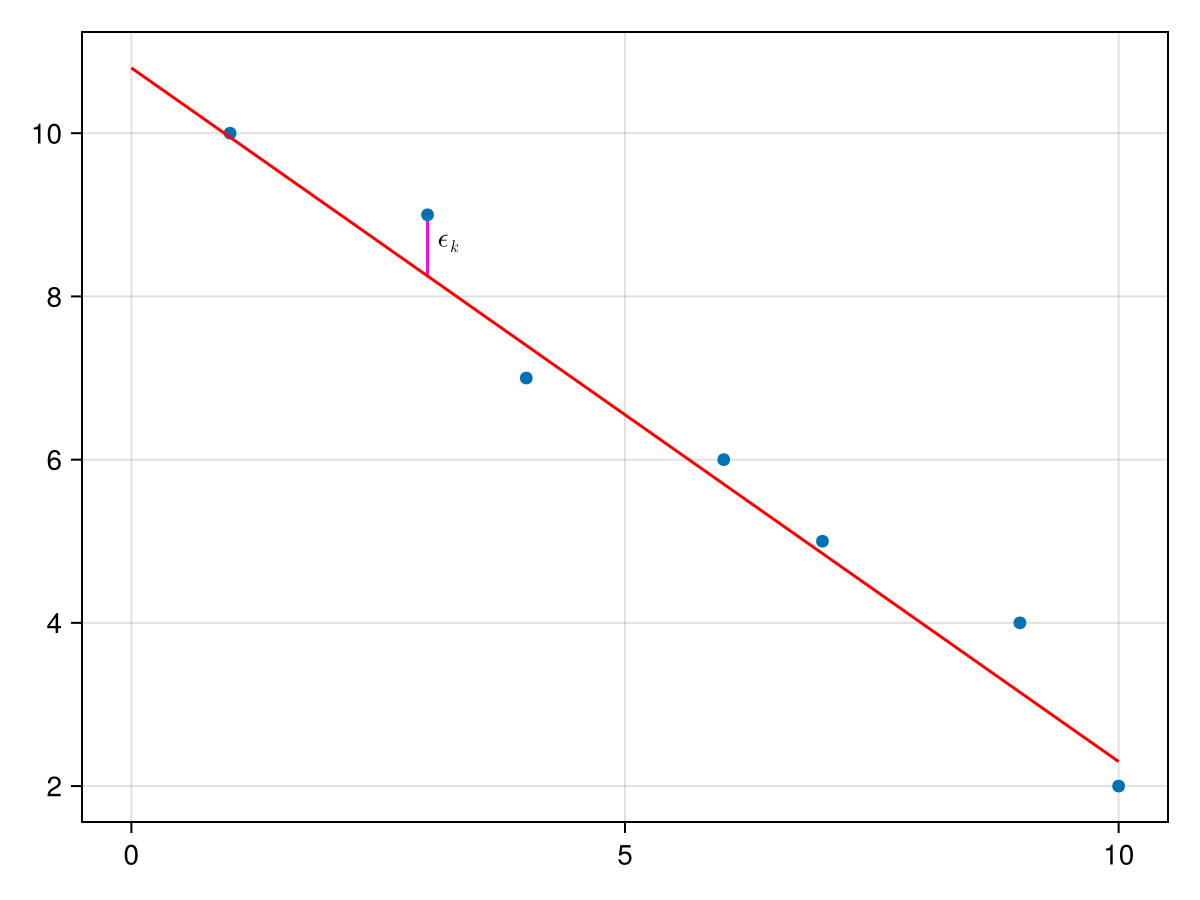

In [9]:
fig = Figure()
ax = Axis(fig[1,1])
lines!(ax,[3, 3],[9,10.8-0.85*3], color=:magenta)
scatter!(ax, data.x, data.y)
lines!(ax, 0..10, x->10.8-0.85x, color=:red)
text!(ax,3.1,8.5, text = L"\epsilon_k")
fig

In [10]:
save("../assets/plots/linear-regression/lr-diagram.png", fig)

CairoMakie.Screen{IMAGE}


In [7]:
X = [data.x[i]^k for i=1:size(data,1), k=0:1]

7×2 Matrix{Int64}:
 1   1
 1   3
 1   4
 1   6
 1   7
 1   9
 1  10

In [10]:
c = inv(transpose(X)*X)*transpose(X)*data.y

2-element Vector{Float64}:
 10.981981981981981
 -0.846846846846846

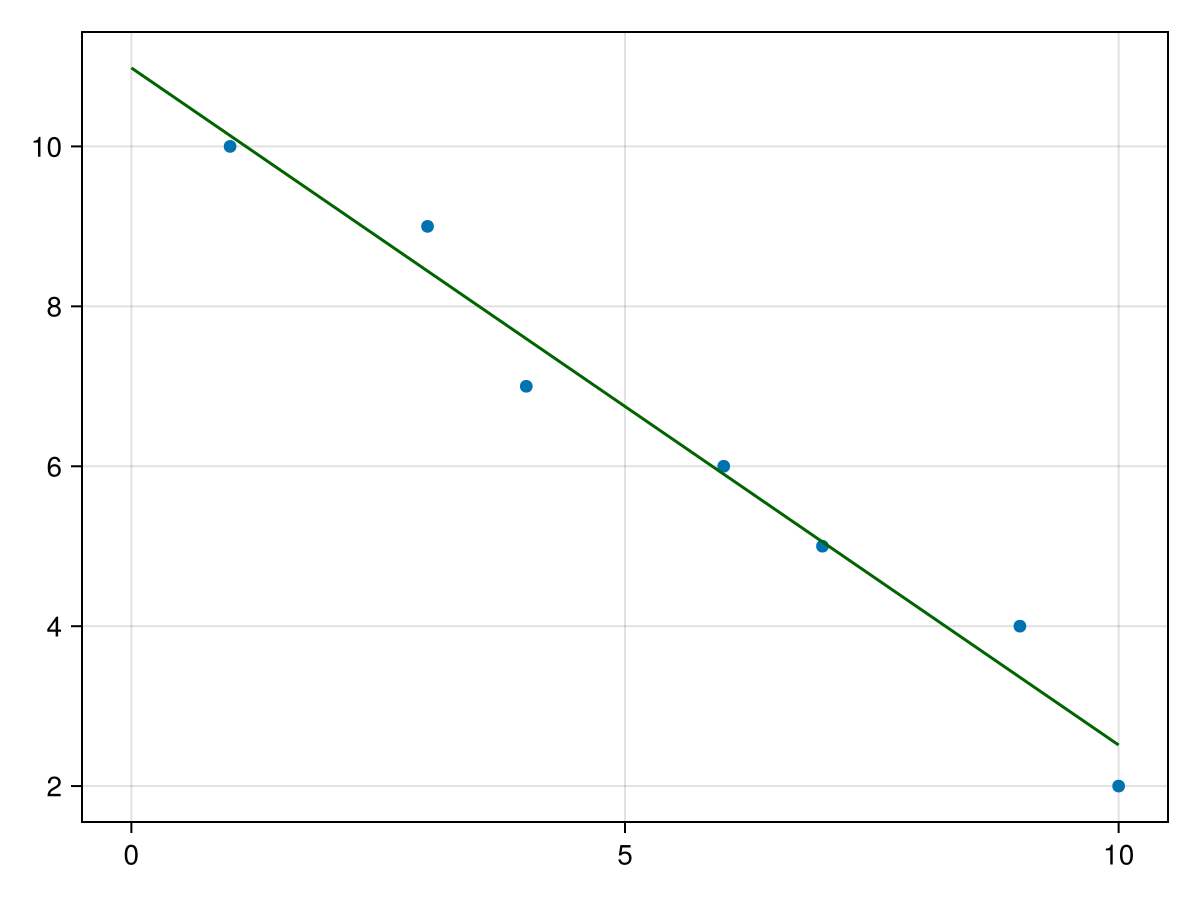

In [13]:
fig, ax = scatter(data.x,data.y)
lines!(ax,0..10,x -> c[2]*x+c[1], color = :darkgreen)
fig

In [14]:
save("../assets/plots/linear-regression/best-fit.png", fig)

CairoMakie.Screen{IMAGE}
